In [5]:
!pip install pandas


In [9]:
import pandas as pd

In [10]:
# Update the file path based on your actual file location
file_path = r'C:\Users\Admin\Desktop\G Reviews\apps.csv'
apps_with_duplicates = pd.read_csv(file_path)

In [11]:
apps_with_duplicates.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

In [14]:
# Print the total number of apps
print('Total number of apps in the dataset = ', apps.shape[0])

# Have a look at a random sample of 5 rows
print(apps.sample(5))

Total number of apps in the dataset =  9659
      Unnamed: 0                                                App  \
8164        9284                                         EF Summits   
5170        6166                            Auto Background Changer   
4302        5256                       A.J. Green Wallpapers 4 Fans   
7106        8175  Master for Minecraft(Pocket Edition)-Mod Launcher   
7591        8699                                    Dp for Facebook   

              Category  Rating  Reviews  Size     Installs  Type Price  \
8164  TRAVEL_AND_LOCAL     NaN        0  19.0         100+  Free     0   
5170       PHOTOGRAPHY     4.0    35188   6.2   1,000,000+  Free     0   
4302         LIFESTYLE     NaN        0   4.3           5+  Free     0   
7106             TOOLS     4.6  2674051  26.0  50,000,000+  Free     0   
7591            SOCIAL     4.1       56  10.0       5,000+  Free     0   

     Content Rating          Genres       Last Updated Current Ver  \
8164       Eve

In [15]:
# DATA CLEANING


# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


In [16]:
#Correcting data types

import numpy as np

# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype('float')

# Convert Price to float data type
apps['Price'] = apps['Price'].astype('float')

# Checking dtypes of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.0+ MB
None


Number of categories =  33


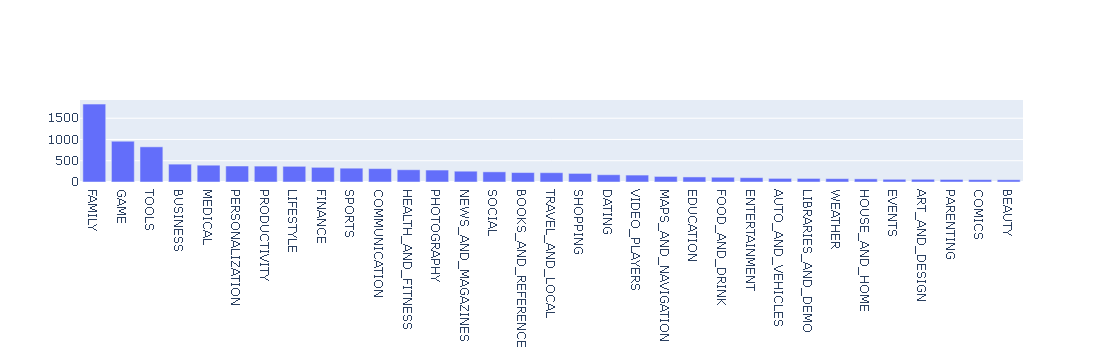

In [17]:
#Exploring app categories
!pip install plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)


Average app rating =  4.173243045387994


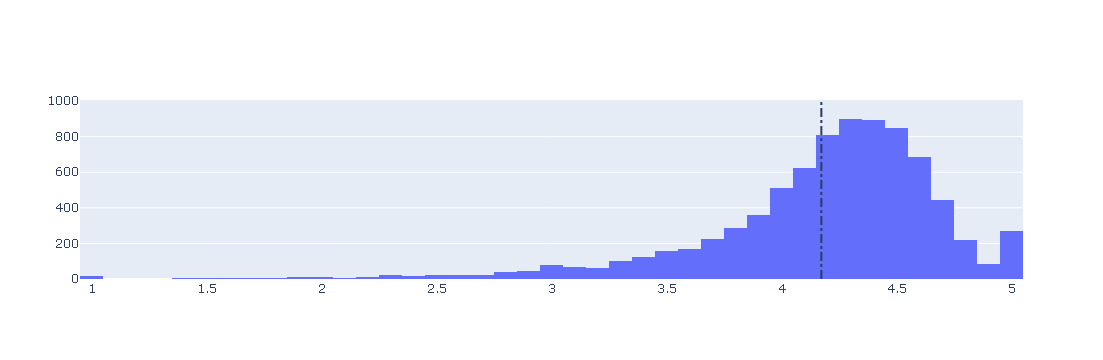

In [18]:
#Distribution of app ratings

# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

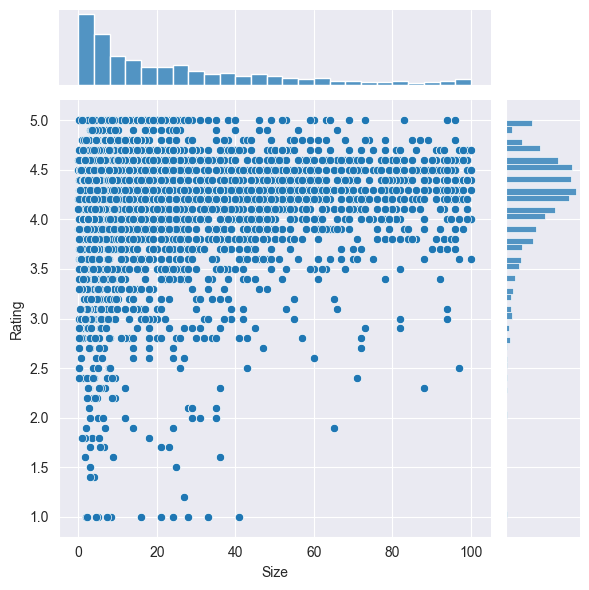

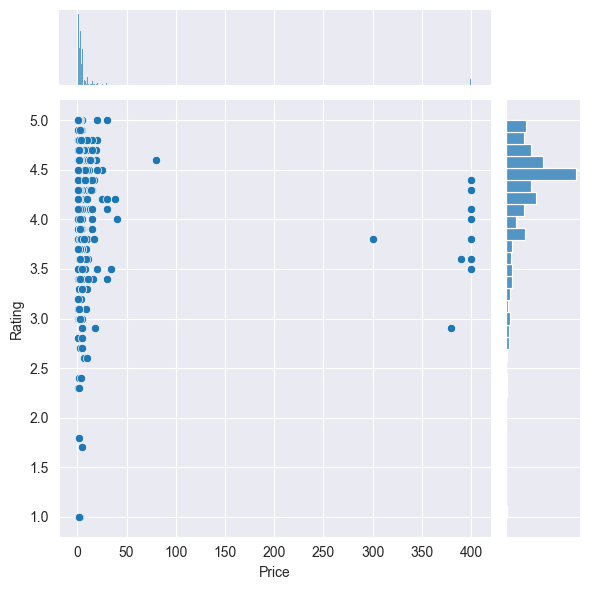

In [19]:
#Size and price of an app
!pip install seaborn

!pip install matplotlib

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[apps.Rating.notnull() & apps.Size.notnull()]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


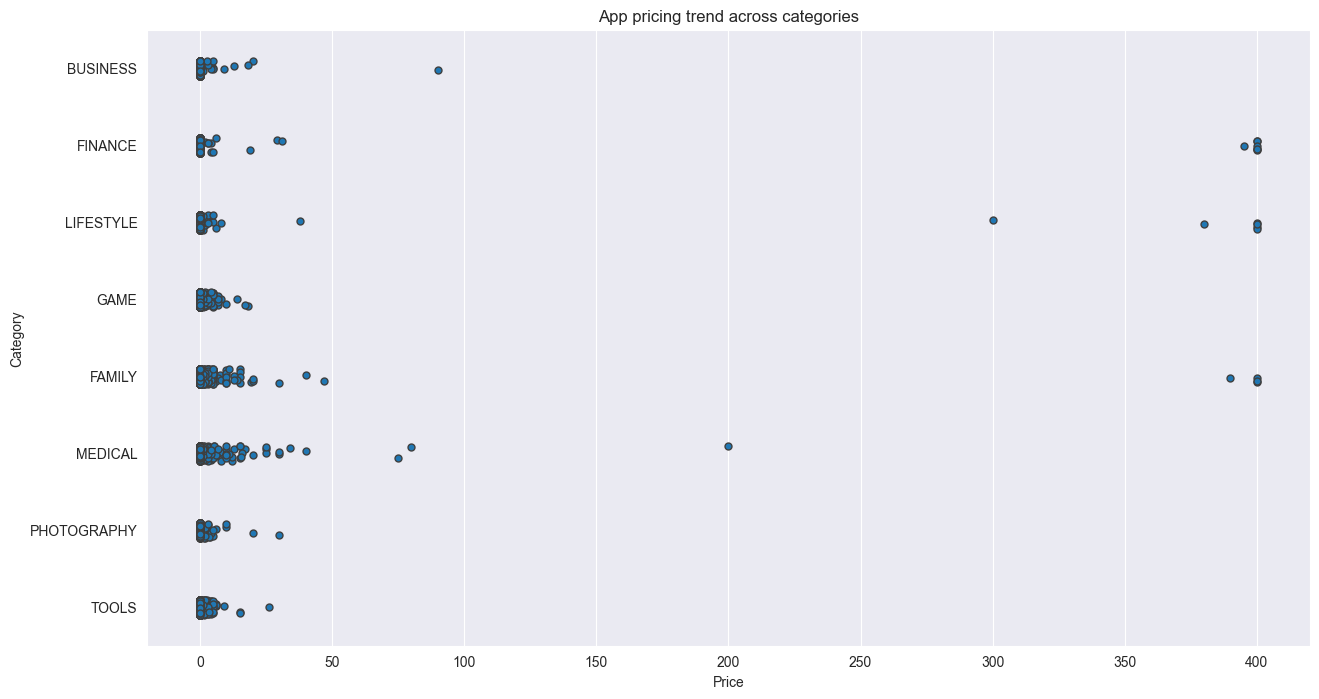

In [20]:
#Relation between app category and app price

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

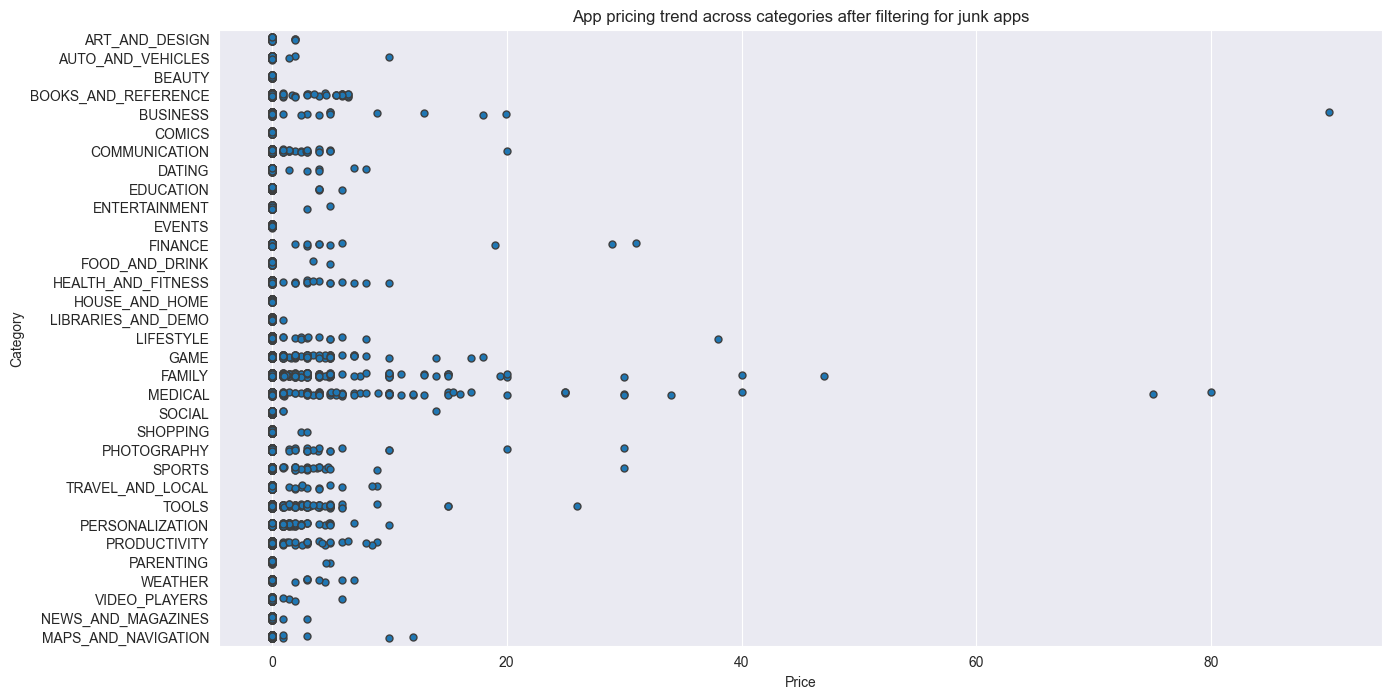

In [21]:
#Filter out "junk" apps

# Select apps priced below $100
apps_under_100 = apps[apps.Price < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

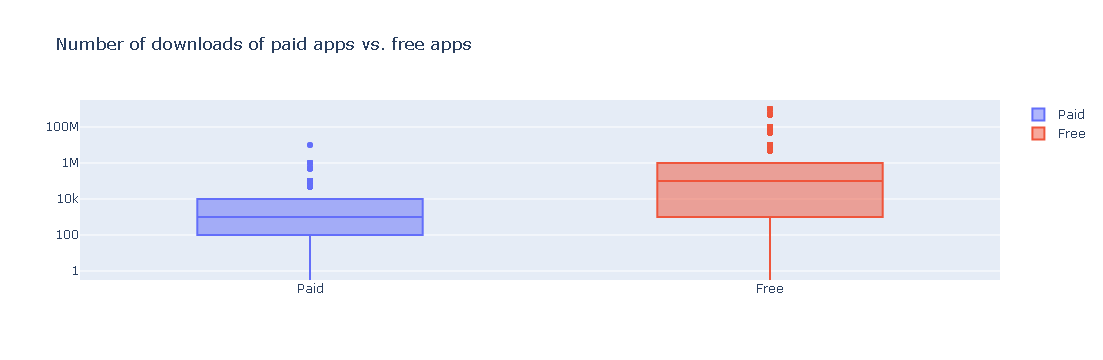

In [22]:
#Popularity of paid apps vs free apps

trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [29]:
# Load user_reviews.csv
file_path2 = r'C:\Users\Admin\Desktop\G Reviews\user_reviews.csv'
reviews_df = pd.read_csv(file_path2)
reviews_df.head()

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

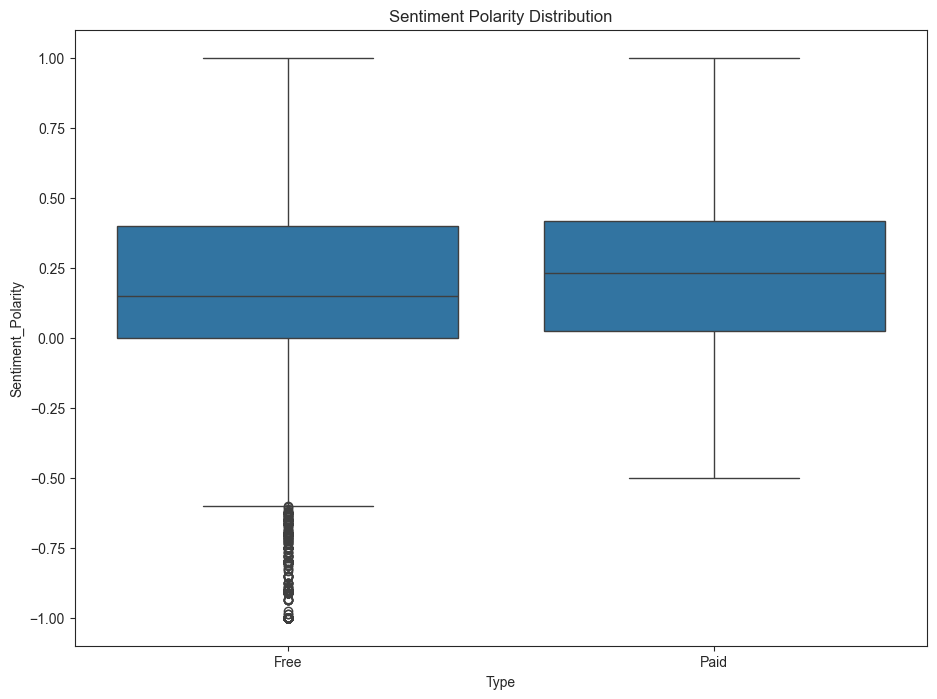

In [30]:
# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = "App", how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = "Type", y = "Sentiment_Polarity", data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

In [31]:
reviews_df=reviews_df.dropna()
reviews_df

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


<Axes: >

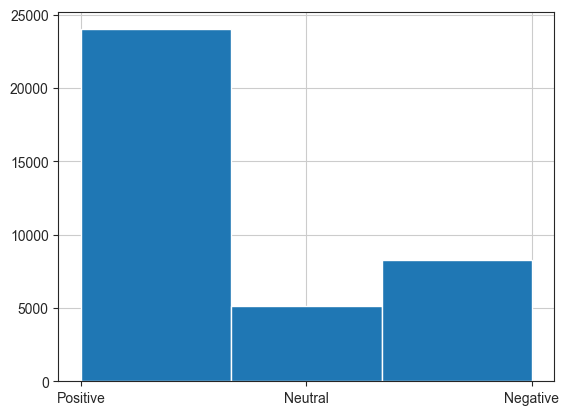

In [32]:
# Sentiment histogram
reviews_df["Sentiment"].hist(bins=3)

In [56]:
reviews_df[reviews_df["Sentiment"]=="Positive"]["Review"].head(10)

0     I like eat delicious food. That's I'm cooking ...
1       This help eating healthy exercise regular basis
3            Works great especially going grocery store
4                                          Best idea us
5                                              Best way
6                                               Amazing
10                                            good you.
11    Useful information The amount spelling errors ...
12    Thank you! Great app!! Add arthritis, eyes, im...
13    Greatest ever Completely awesome maintain heal...
Name: Review, dtype: object

In [58]:
reviews_df[reviews_df["Sentiment"]=="Neutral"]["Review"].head(10)


8                      Looking forward app,
9     It helpful site ! It help foods get !
22                               God health
25        I found lot wealth form health...
29                              On test....
51                                   I like
56                             This helpful
61                                      Luv
64                     Doesn't work... Zero
86                    This 5 starr Download
Name: Review, dtype: object

In [60]:
reviews_df[reviews_df["Sentiment"]=="Negative"]["Review"].head(10)

32                    No recipe book Unable recipe book.
43     Waste time It needs internet time n ask calls ...
68                               Faltu plz waste ur time
85                                     Crap Doesn't work
95     Boring. I thought actually just texts that's i...
132                   No recipe book Unable recipe book.
143    Waste time It needs internet time n ask calls ...
168                              Faltu plz waste ur time
185                                    Crap Doesn't work
195    Boring. I thought actually just texts that's i...
Name: Review, dtype: object